# Progetto di Data Mining 2.5 Clustering

## Pendigits Dataset Analysis and Processing

Importiamo le librerie che andremo ad utilizzare

In [4]:
#import Librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_openml

Scarichiamo il Dataset

target
2    1144
4    1144
0    1143
1    1143
7    1142
6    1056
3    1055
5    1055
8    1055
9    1055
Name: count, dtype: int64
   x0   y0  x1   y1   x2   y2   x3   y3  x4  y4   x5  y5   x6  y6   x7  y7  \
0  47  100  27   81   57   37   26    0   0  23   56  53  100  90   40  98   
1   0   89  27  100   42   75   29   45  15  15   37   0   69   2  100   6   
2   0   57  31   68   72   90  100  100  76  75   50  51   28  25   16   0   
3   0  100   7   92    5   68   19   45  86  34  100  45   74  23   67   0   
4   0   67  49   83  100  100   81   80  60  60   40  40   33  20   47   0   

  target  
0      8  
1      2  
2      1  
3      4  
4      1  


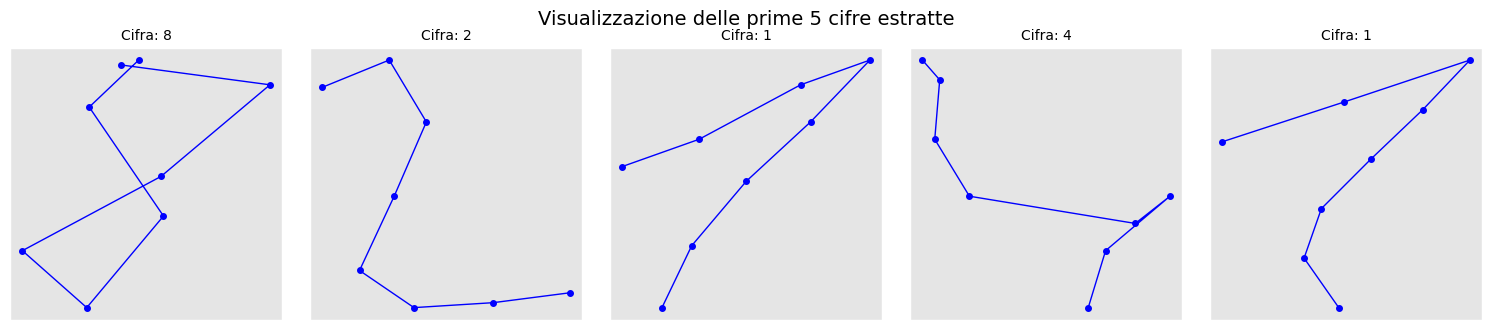

Il dataset non contiene valori mancanti


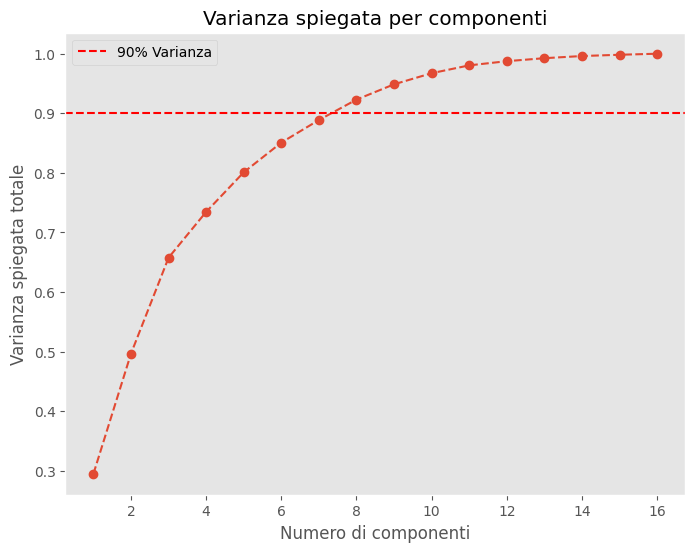

Numero ottimale di componenti: 8
Dataset PCA salvato in: ../data/processed/pendigits_pca.csv


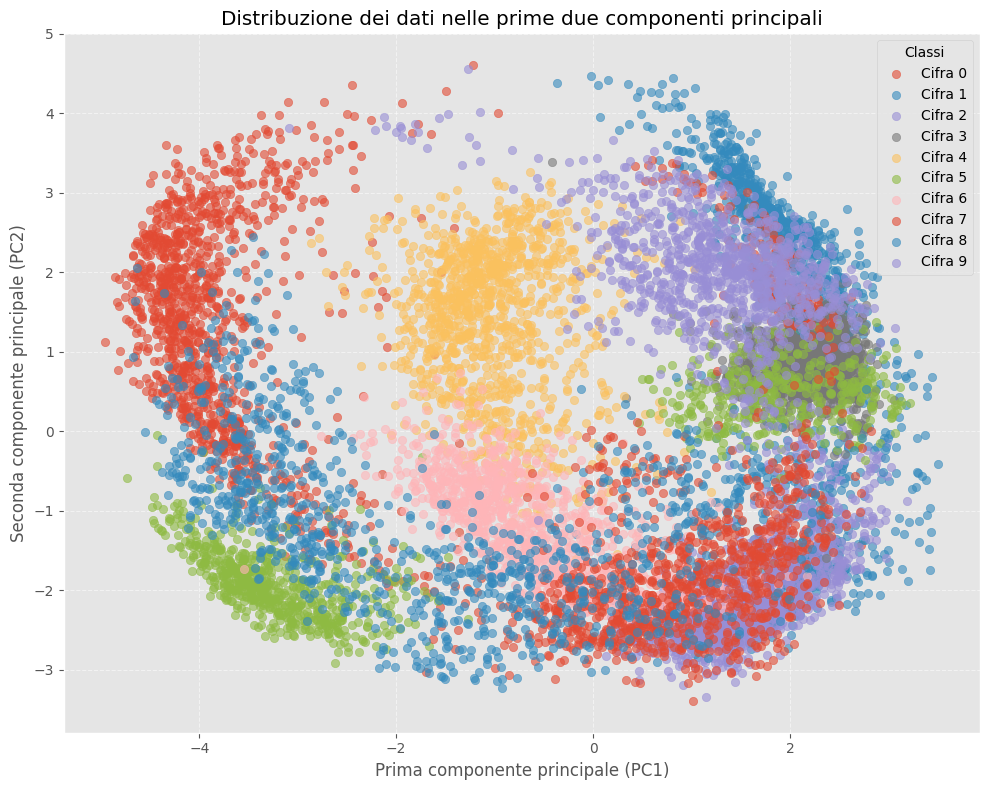

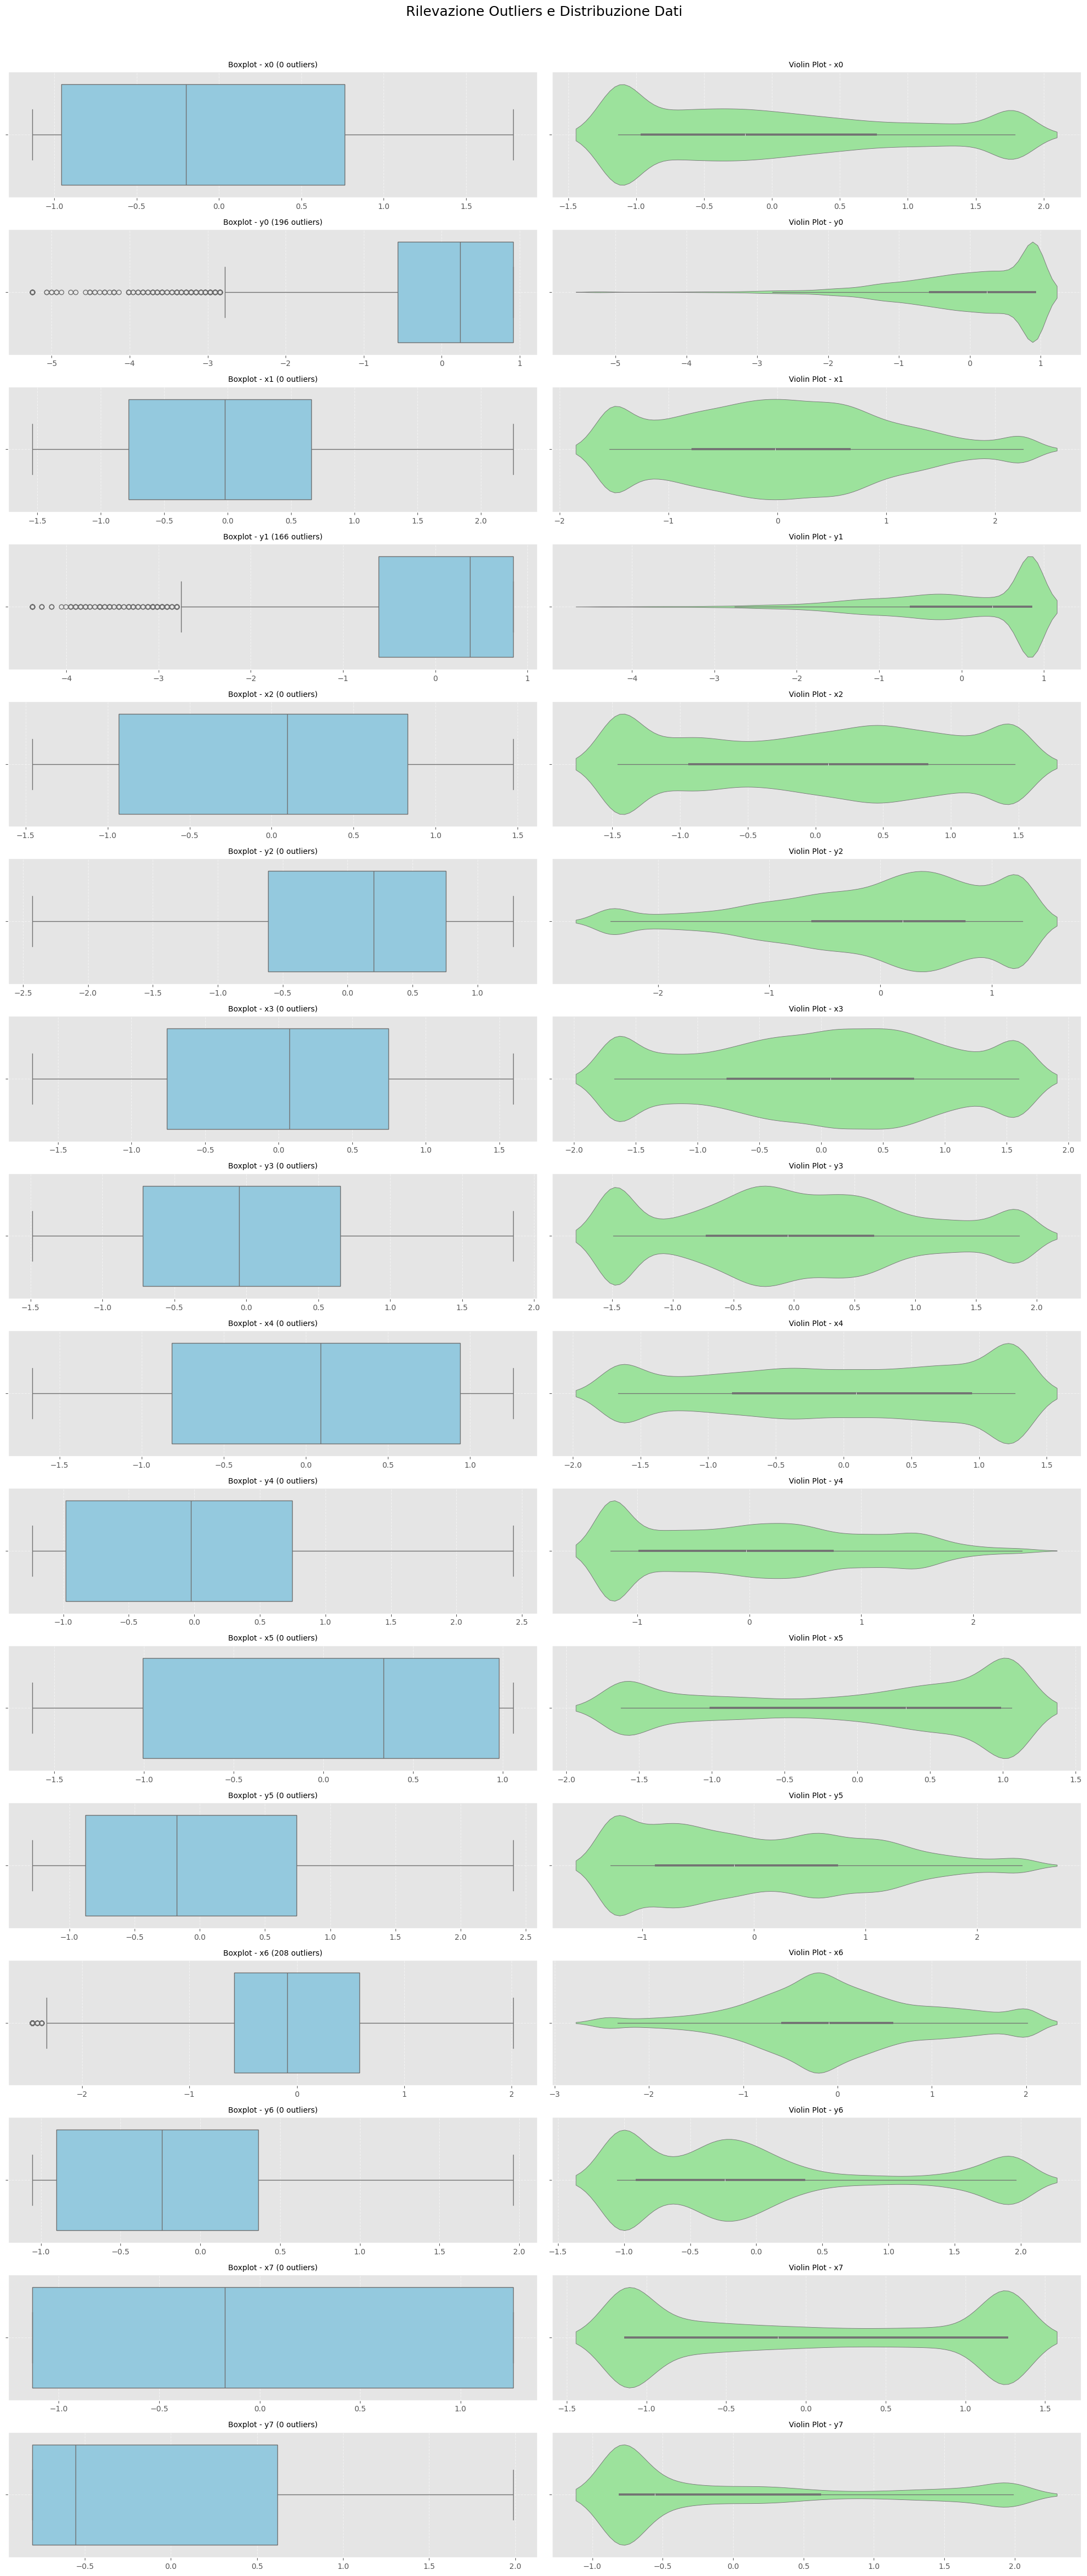

Riepilogo degli Outliers:
Feature x0: 0 outliers
Feature y0: 196 outliers
Feature x1: 0 outliers
Feature y1: 166 outliers
Feature x2: 0 outliers
Feature y2: 0 outliers
Feature x3: 0 outliers
Feature y3: 0 outliers
Feature x4: 0 outliers
Feature y4: 0 outliers
Feature x5: 0 outliers
Feature y5: 0 outliers
Feature x6: 208 outliers
Feature y6: 0 outliers
Feature x7: 0 outliers
Feature y7: 0 outliers
Totale outliers rilevati: 570


In [15]:
#funzione per scaricare il dataset
def get_data(name: str):
    
    #recupero il dataset dal modulo sklearn
    pendigits = fetch_openml(name = "pendigits", version=1, as_frame=True)
    
    #creo un dataframe con i dati e le etichette
    X = pendigits.data
    y = pendigits.target

    #estraggo il numero di colonne del dataframe
    n_col = X.shape[1]

    #modifico il nome delle classi
    X.columns = [
    f"x{index}" if i % 2 == 0 else f"y{index}"
    for i in range(n_col)
    for index in [i // 2]
    ]

    #unisco i dati e le etichette in un unico dataframe
    df = X.copy()
    df['target'] = y
    
    print(df['target'].value_counts())
    #visualizziamo le prime 5 righe del dataset
    print(df.head())
    
    #salvo il dataframe in formato csv
    df.to_csv("../data/raw/pendigits.csv", index = False)
    
#funzione per visualizzare un campione dei dati estratti con qualità per pubblicazione scientifica
def visualize_raw_data():
    # recupero il dataset
    ds = pd.read_csv("../data/raw/pendigits.csv")

    # estraggo le features e i targets
    X = ds.drop(columns="target")
    y = ds["target"]

    # seleziono le prime 5 istanze
    indices = range(5)

    # imposto i sottografi con uno stile migliorato
    fig, axes = plt.subplots(1, 5, figsize=(15, 3), constrained_layout=True)

    # titolo principale in stile scientifico
    fig.suptitle('Visualizzazione delle prime 5 cifre estratte', fontsize=14, y=1.05)

    for i, index in enumerate(indices):
        instance = X.iloc[index].values
        digit = y.iloc[index]

        # estraggo le coordinate dei punti che formano la cifra
        x_coords = instance[::2]
        y_coords = instance[1::2]

        # disegno i punti che formano la cifra
        axes[i].plot(x_coords, y_coords, marker='o', color='blue', markersize=4, linewidth=1)
        axes[i].set_title(f'Cifra: {digit}', fontsize=10)
        axes[i].set_xticks([])  # rimuove le etichette sugli assi
        axes[i].set_yticks([])
        axes[i].set_aspect('equal')  # garantisce proporzioni uguali
        axes[i].grid(True, linestyle='--', alpha=0.4)
        plt.grid(True, linestyle='--', alpha=0.5)


    plt.show()


#funzione per effettuare il preprocessamento del dataset
def preprocessing_pipeline():

    #apriamo il dataset che abbiamo creato 
    df = pd.read_csv("../data/raw/pendigits.csv")
    y = df['target']
    X = df.drop(columns=["target"])
    
    #verifichiamo la presenza di valori mancanti
    missing_counts = X.isnull().sum()
    if not missing_counts.any():
        print("Il dataset non contiene valori mancanti") 
    else: 
        print("Il dataset contiene valori mancanti")
    
    #standardizziamo il dataset
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    #ricreiamo il dataframe con le feature standardizzate
    df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    df_scaled['target'] = y.reset_index(drop=True)

    #salviamo il dataset standardizzato in formato csv
    output_path = "../data/processed/pendigits_standardized.csv"
    df_scaled.to_csv(output_path, index=False)
    
    #applichiamo la pca per effettuare una feature extraction
    pca = PCA()
    X_pca = pca.fit(X_scaled)

    #determiniamo il numero di componenti ottimale con l'elbow method
    explained_variance = np.cumsum(X_pca.explained_variance_ratio_)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
    plt.title('Varianza spiegata per componenti')
    plt.xlabel('Numero di componenti')
    plt.ylabel('Varianza spiegata totale')
    plt.axhline(y=0.9, color='r', linestyle='--', label='90% Varianza')
    plt.legend()
    plt.grid()
    plt.show()

    #selezioniamo il numero di componenti che spiegano ~90% della varianza
    optimal_components = np.argmax(explained_variance >= 0.9) + 1
    print(f"Numero ottimale di componenti: {optimal_components}")
    pca = PCA(n_components=optimal_components)
    X_pca_optimal = pca.fit_transform(X_scaled)

    #ricreiamo il dataframe con le feature estratte
    pca_columns = [f"PC{i+1}" for i in range(optimal_components)]
    df_pca = pd.DataFrame(X_pca_optimal, columns=pca_columns)
    df_pca['target'] = y.reset_index(drop=True)

    #salviamo il dataset trasformato in formato csv
    output_path = "../data/processed/pendigits_pca.csv"
    df_pca.to_csv(output_path, index=False)
    print(f"Dataset PCA salvato in: {output_path}")

#funzione per visualizzare la distribuzione delle classi dopo la feature extraction
def visualize_pca_2d():
    #carichiamo il dataset PCA salvato
    df_pca = pd.read_csv("../data/processed/pendigits_pca.csv")

    #visualizziamo le prime due componenti principali, ordinando le classi
    plt.figure(figsize=(10, 8))
    for label in sorted(df_pca['target'].unique()):
        subset = df_pca[df_pca['target'] == label]
        plt.scatter(
            subset['PC1'],
            subset['PC2'],
            label=f'Cifra {label}',
            alpha=0.6
        )
    plt.title('Distribuzione dei dati nelle prime due componenti principali')
    plt.xlabel('Prima componente principale (PC1)')
    plt.ylabel('Seconda componente principale (PC2)')
    plt.legend(title="Classi")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


#funzione per verificare, visualizzare gli outliers e la distribuzione delle features
def check_and_visualize_outliers_and_distribution():
    #carichiamo il dataset standardizzato
    df = pd.read_csv("../data/processed/pendigits_standardized.csv")
    X = df.drop(columns=["target"])
    
    #dizionario per salvare la presenza di outliers per ogni feature
    outlier_summary = {}

    #creazione della figura con due righe per ogni feature: boxplot e violin plot
    num_features = len(X.columns)
    plt.figure(figsize=(20, num_features * 3))
    plt.suptitle('Rilevazione Outliers e Distribuzione Dati', fontsize=18)

    for i, column in enumerate(X.columns):
        #calcolo dei valori di soglia per individuare gli outliers
        Q1 = X[column].quantile(0.25)
        Q3 = X[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        #conteggio degli outliers
        outliers = ((X[column] < lower_bound) | (X[column] > upper_bound)).sum()
        outlier_summary[column] = outliers

        #aggiunta del boxplot
        plt.subplot(num_features, 2, 2 * i + 1)
        sns.boxplot(x=X[column], color="skyblue")
        plt.title(f"Boxplot - {column} ({outliers} outliers)", fontsize=10)
        plt.xlabel("")
        plt.grid(True, linestyle='--', alpha=0.5)

        #aggiunta del violin plot
        plt.subplot(num_features, 2, 2 * i + 2)
        sns.violinplot(x=X[column], color="lightgreen")
        plt.title(f"Violin Plot - {column}", fontsize=10)
        plt.xlabel("")
        plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

    #visualizzazione del riepilogo degli outliers
    print("Riepilogo degli Outliers:")
    for feature, count in outlier_summary.items():
        print(f"Feature {feature}: {count} outliers")

    #verifica se ci sono outliers
    total_outliers = sum(outlier_summary.values())
    if total_outliers > 0:
        print(f"Totale outliers rilevati: {total_outliers}")
    else:
        print("Non sono stati rilevati outliers nel dataset.")

get_data("pendigits")
visualize_raw_data()
preprocessing_pipeline()
visualize_pca_2d()
check_and_visualize_outliers_and_distribution()



Visualizziamo un item del del dataset

Checking for missing values...
No missing values found.
Standardizing the dataset...
Applying PCA...


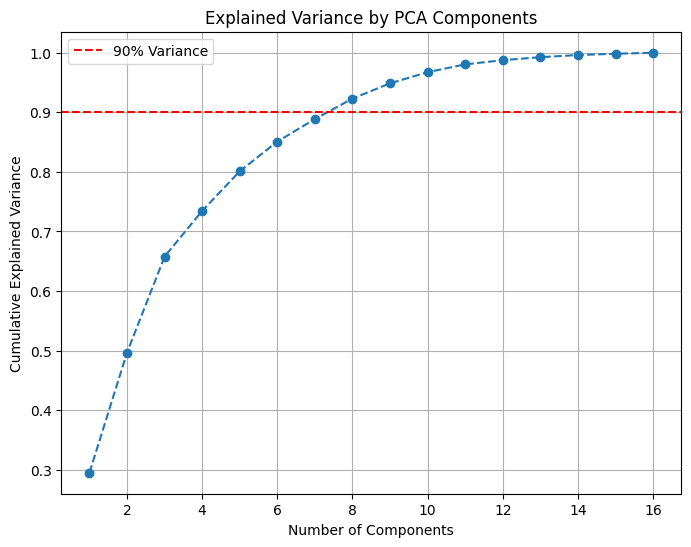

Optimal number of components: 8


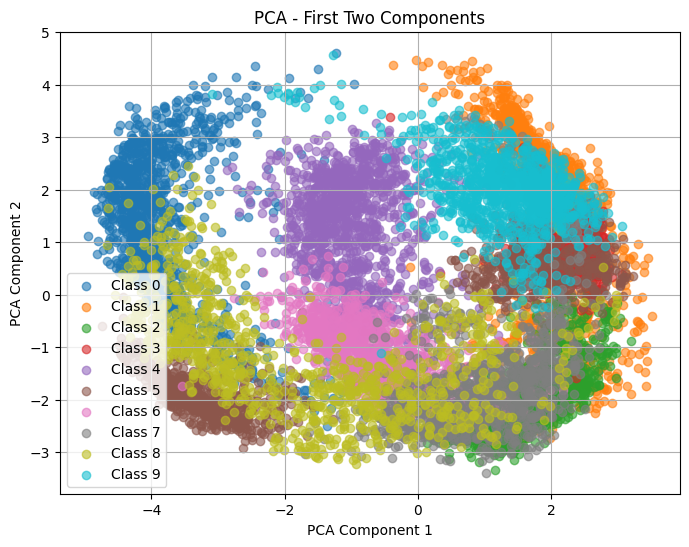

Preprocessing complete. Data saved to 'processed_pendigits.csv'.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_openml

# Step 1: Load the dataset
data = fetch_openml(name='pendigits', version=1)
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')



# Step 4: Apply PCA to reduce dimensionality
print("Applying PCA...")
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine optimal number of components using the elbow method
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.legend()
plt.grid()
plt.show()

# Select number of components that explain ~90% variance
optimal_components = np.argmax(explained_variance >= 0.9) + 1
print(f"Optimal number of components: {optimal_components}")
pca = PCA(n_components=optimal_components)
X_pca_optimal = pca.fit_transform(X_scaled)

# Step 5: Visualize the first two PCA components
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(
        X_pca_optimal[y == label, 0],
        X_pca_optimal[y == label, 1],
        label=f'Class {label}',
        alpha=0.6
    )
plt.title('PCA - First Two Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()

# Save the processed data
processed_data = pd.DataFrame(X_pca_optimal, columns=[f'PC{i+1}' for i in range(optimal_components)])
processed_data['target'] = y.reset_index(drop=True)
processed_data.to_csv('processed_pendigits.csv', index=False)
print("Preprocessing complete. Data saved to 'processed_pendigits.csv'.")


1